<a href="https://colab.research.google.com/github/GeorgeNance/ml-research/blob/master/pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastai duckduckgo_search

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 15.7 MB/s eta 0:00:00


In [25]:
from duckduckgo_search import ddg_images
from fastcore.all import *
from fastai.vision.widgets import *
from fastai.vision.all import *
from fastdownload import download_url
from fastai.data.transforms import GrandparentSplitter

def search_images(term, max_images=50):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [30]:
import zipfile
with zipfile.ZipFile("train.zip","r") as zip_ref:
    zip_ref.extractall("train")

with zipfile.ZipFile("valid.zip","r") as zip_ref:
    zip_ref.extractall("valid")

In [31]:
path = Path('train')


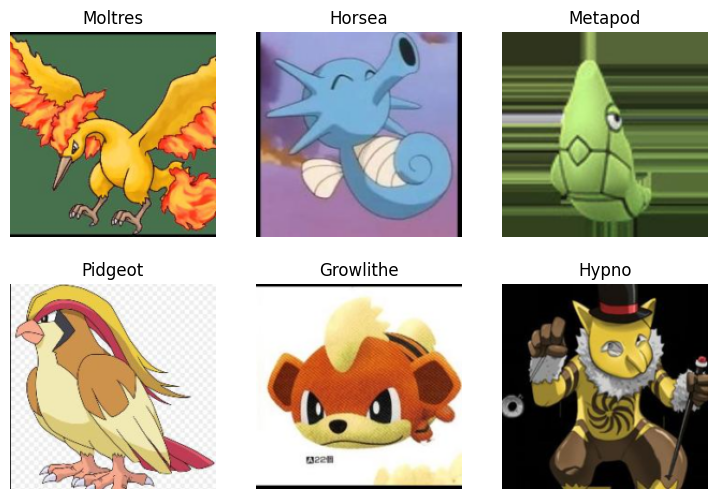

In [32]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=GrandparentSplitter(train_name='train', valid_name='test'),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [33]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 54.3MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,3.212055,None,None,00:18


/usr/local/lib/python3.10/dist-packages/fastprogress/fastprogress.py:73: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


epoch,train_loss,valid_loss,error_rate,time
0,0.939980,None,None,00:20
1,0.396912,None,None,00:22
2,0.150693,None,None,00:23


In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

# Testing

Searching for 'wartortle'


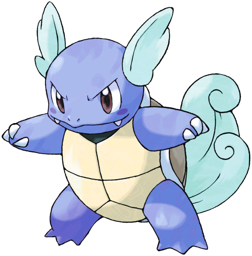

In [52]:
download_url(search_images('wartortle', max_images=1)[0], 'test.jpg', show_progress=False)
Image.open('test.jpg').to_thumb(256,256)

In [53]:


pokemon,_,probs = learn.predict(PILImage.create('test.jpg'))
print(f"This is {pokemon}.")


This is Nidorina.


In [39]:
learn.export("pokemon.pkl")